<a href="https://colab.research.google.com/github/kritinkesavkts/Nlp-project/blob/main/Copy_of_Hatespeech_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TOPIC - A

Classifying if a tweet is offensive or not

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:
label_data = pd.read_csv("labels-levela.csv")
tweets_data = pd.read_csv("testset-levela.tsv", sep='\t')

In [ ]:
dataset = pd.merge(tweets_data, label_data, on='id')
dataset.head()

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF


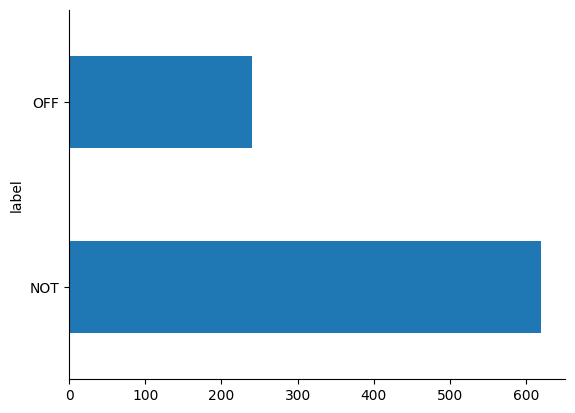

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('label').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset['label'].value_counts()

label
NOT    620
OFF    240
Name: count, dtype: int64

In [ ]:
dataset.isnull().any()

id       False
tweet    False
label    False
dtype: bool

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
    return preprocessed_text

In [ ]:
dataset['preprocessed_text'] = dataset['tweet'].apply(preprocess_text)

In [ ]:
dataset.head()

,id,tweet,label,preprocessed_text
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,whoisq wherestheserv dumpnik declasfisa democr...
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,constitutionday rever conserv hate progressive...
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,foxnew nra maga potu trump ndamend rnc usmc ve...
3,13876,#Watching #Boomer getting the news that she is...,NOT,watch boomer get news still parol alway make s...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,nopasaran uniti demo oppos farright london ant...


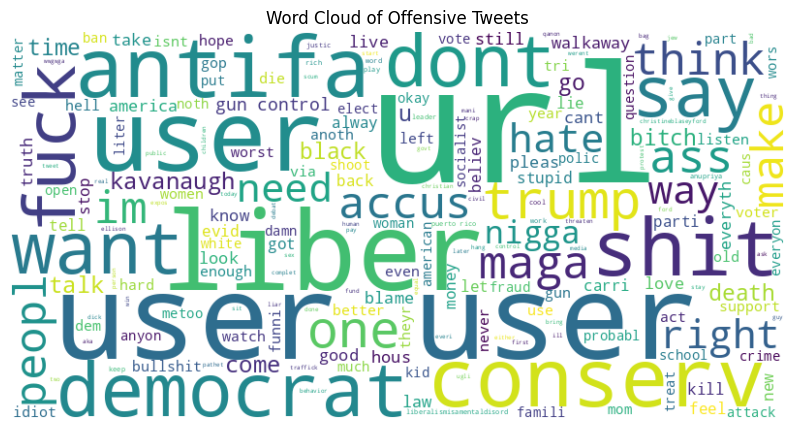

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


off_tweets = dataset[dataset['label'] == 'OFF']['preprocessed_text']

all_off_tweets = ' '.join(off_tweets)

custom_stopwords = set(stopwords.words('english'))
custom_punctuation = set(string.punctuation)

tokens = word_tokenize(all_off_tweets)

cleaned_tokens = [token.lower() for token in tokens if token.lower() not in custom_stopwords and token.lower() not in custom_punctuation]

cleaned_text = ' '.join(cleaned_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Offensive Tweets')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['preprocessed_text'], dataset['label'], test_size=0.2, random_state=42, stratify=dataset['label'])

In [ ]:
classifier_randomforest = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier())
])

classifier_logisticregression = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression())
])

classifier_svc = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', SVC())
])

classifier_mlp = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, activation='relu', solver='adam'))
])

In [ ]:
classifier_logisticregression.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

In [ ]:
classifier_randomforest.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', RandomForestClassifier())])

In [ ]:
classifier_svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', SVC())])

In [ ]:
classifier_mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('classifier', MLPClassifier(max_iter=100))])

In [ ]:
predictions_logistic = classifier_logisticregression.predict(X_test)
print(classification_report(y_test, predictions_logistic))

              precision    recall  f1-score   support

         NOT       0.75      1.00      0.86       124
         OFF       1.00      0.15      0.25        48

    accuracy                           0.76       172
   macro avg       0.88      0.57      0.56       172
weighted avg       0.82      0.76      0.69       172



In [ ]:
predictions_randomforest = classifier_randomforest.predict(X_test)
print(classification_report(y_test, predictions_randomforest))

              precision    recall  f1-score   support

         NOT       0.78      0.98      0.87       124
         OFF       0.88      0.29      0.44        48

    accuracy                           0.79       172
   macro avg       0.83      0.64      0.65       172
weighted avg       0.81      0.79      0.75       172



In [ ]:
predictions_svc = classifier_svc.predict(X_test)
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

         NOT       0.76      1.00      0.86       124
         OFF       1.00      0.19      0.32        48

    accuracy                           0.77       172
   macro avg       0.88      0.59      0.59       172
weighted avg       0.83      0.77      0.71       172



In [ ]:
predictions_mlp = classifier_mlp.predict(X_test)
print(classification_report(y_test, predictions_mlp))

              precision    recall  f1-score   support

         NOT       0.81      0.83      0.82       124
         OFF       0.53      0.50      0.52        48

    accuracy                           0.74       172
   macro avg       0.67      0.67      0.67       172
weighted avg       0.73      0.74      0.74       172



In [ ]:
new_tweet = "Go jump off a cliff, you worthless idiot! #hate"
new_tweet = preprocess_text(new_tweet)
new_tweet = [new_tweet]
predicted_label = classifier_logisticregression.predict(new_tweet)
print(f"Predicted label is: {predicted_label[0]}")

Predicted label is: NOT


Confusion Matrix for Logisitc Classifier:
[[124   0]
 [ 41   7]]


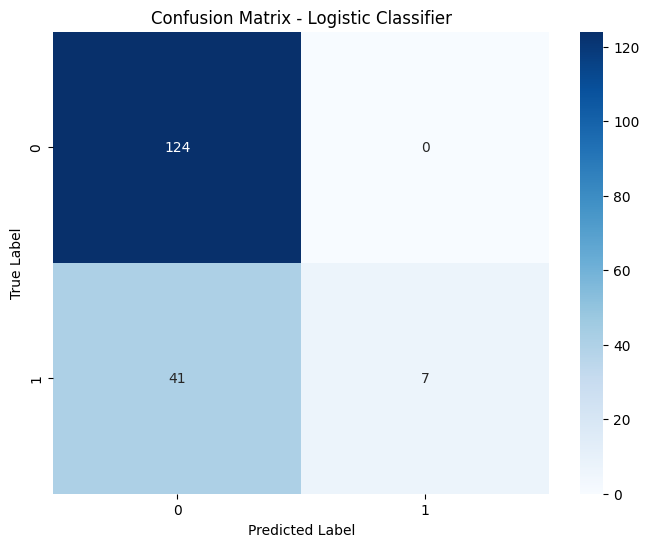

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_mlp = confusion_matrix(y_test, predictions_logistic)

print("Confusion Matrix for Logisitc Classifier:")
print(conf_matrix_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Classifier')
plt.show()

In [ ]:
new_tweet = "Go jump off a cliff, you worthless idiot! #hate"
new_tweet = preprocess_text(new_tweet)
new_tweet = [new_tweet]
predicted_label = classifier_randomforest.predict(new_tweet)
print(f"Predicted label is: {predicted_label[0]}")

Predicted label is: NOT


Confusion Matrix for Random Forest Classifier:
[[122   2]
 [ 34  14]]


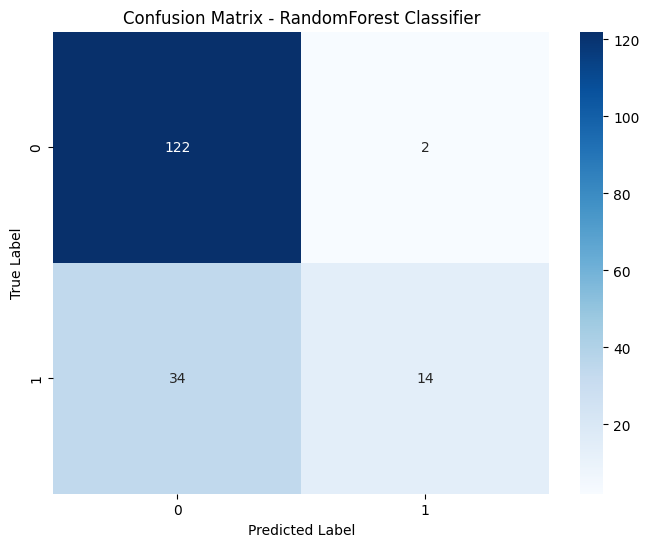

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_mlp = confusion_matrix(y_test, predictions_randomforest)

print("Confusion Matrix for Random Forest Classifier:")
print(conf_matrix_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RandomForest Classifier')
plt.show()

In [ ]:
new_tweet = "Go jump off a cliff, you worthless idiot! #hate"
new_tweet = preprocess_text(new_tweet)
new_tweet = [new_tweet]
predicted_label = classifier_svc.predict(new_tweet)
print(f"Predicted label is: {predicted_label[0]}")

Predicted label is: NOT


Confusion Matrix for Support Vector Classifier:
[[124   0]
 [ 39   9]]


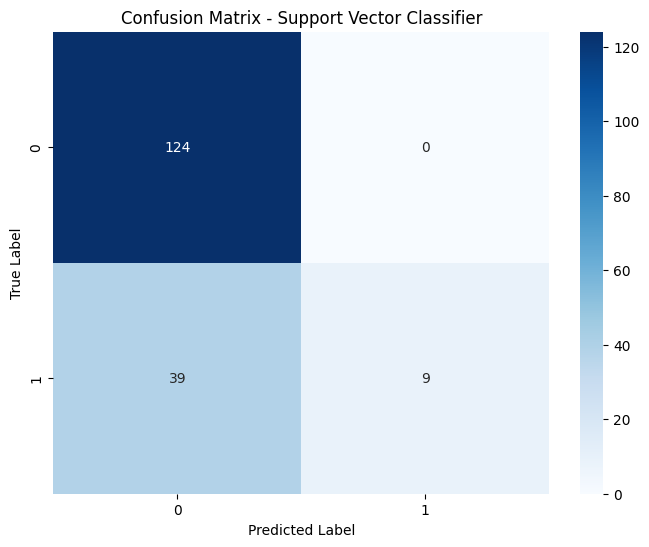

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_mlp = confusion_matrix(y_test, predictions_svc)

print("Confusion Matrix for Support Vector Classifier:")
print(conf_matrix_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

In [ ]:
new_tweet = "Go jump off a cliff, you worthless idiot! #hate"
new_tweet = preprocess_text(new_tweet)
new_tweet = [new_tweet]
predicted_label = classifier_mlp.predict(new_tweet)
print(f"Predicted label is: {predicted_label[0]}")

Predicted label is: OFF


Confusion Matrix for MLP Classifier:
[[103  21]
 [ 24  24]]


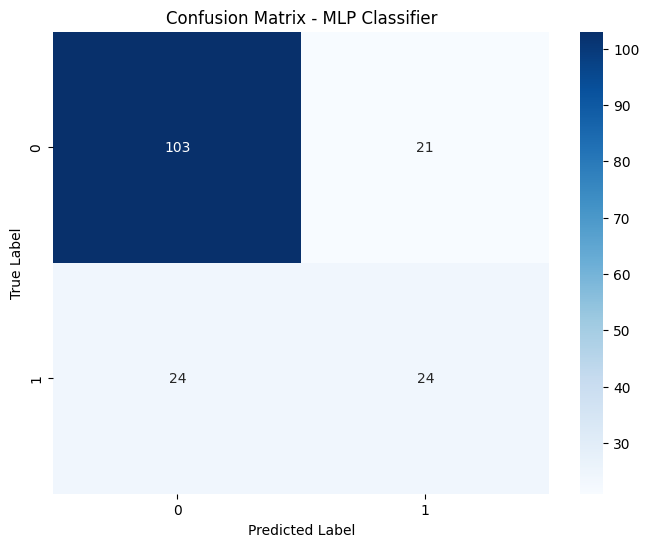

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_mlp = confusion_matrix(y_test, predictions_mlp)

print("Confusion Matrix for MLP Classifier:")
print(conf_matrix_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()


TOPIC - B

Now, that the tweet is offensive, we try to find the level of toxicity of the tweet and retrieve its keywords.

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
train_df = pd.read_csv("trainset.csv")
test_df = pd.read_csv("testset.csv")
test_labels_df = pd.read_csv("test_labels.csv")

In [ ]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_labels_df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
train_df.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [ ]:
test_df.isnull().any()

id              False
comment_text    False
dtype: bool

In [ ]:
test_labels_df.isnull().any()

id               False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [ ]:
test_df['comment_text'] = test_df['comment_text'].apply(preprocess_text)

In [ ]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succes youll ever what hate s...
1,0000247867823ef7,rfc titl fine imo
2,00013b17ad220c46,sourc zaw ashton lapland
3,00017563c3f7919a,look back sourc inform updat correct form gues...
4,00017695ad8997eb,dont anonym edit articl


In [ ]:
train_texts = train_df['comment_text'].values
train_labels = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

test_texts = test_df['comment_text'].values
test_labels = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].replace(-1, 0).values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Convert NumPy arrays to pandas DataFrames for visualization
train_labels_df = pd.DataFrame(train_labels, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

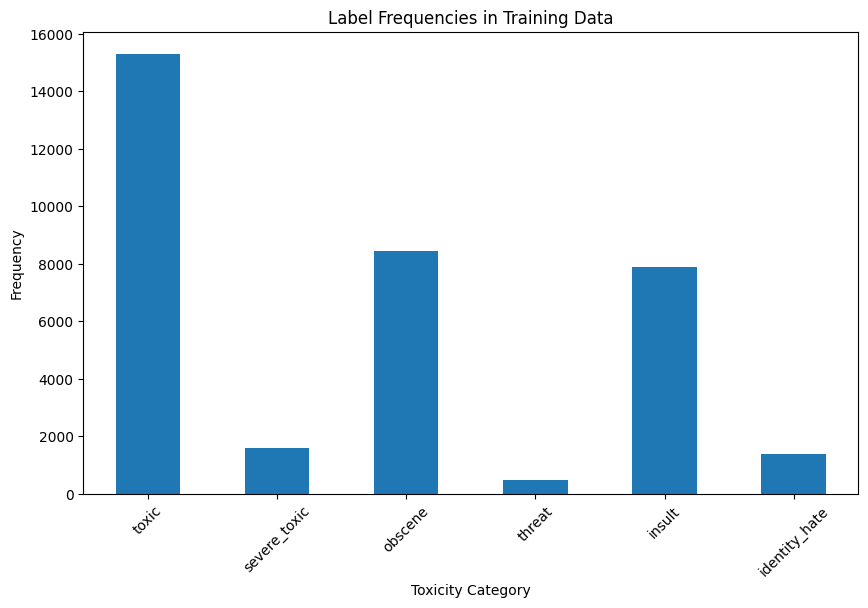

In [ ]:
# Bar plot of label frequencies
plt.figure(figsize=(10, 6))
train_labels_df.sum(axis=0).plot(kind='bar')
plt.title('Label Frequencies in Training Data')
plt.xlabel('Toxicity Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

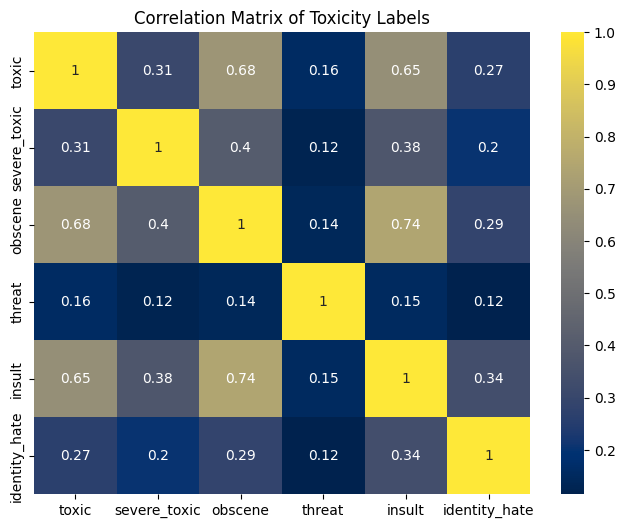

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_labels_df.corr(), annot=True, cmap='cividis')
plt.title('Correlation Matrix of Toxicity Labels')
plt.show()

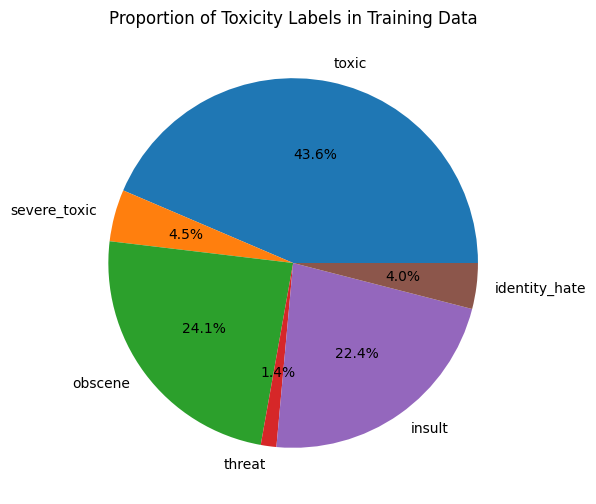

In [ ]:
# Pie chart of label proportions
plt.figure(figsize=(8, 6))
train_labels_df.sum(axis=0).plot(kind='pie', autopct='%1.1f%%', labels=train_labels_df.columns)
plt.title('Proportion of Toxicity Labels in Training Data')
plt.ylabel('')
plt.show()

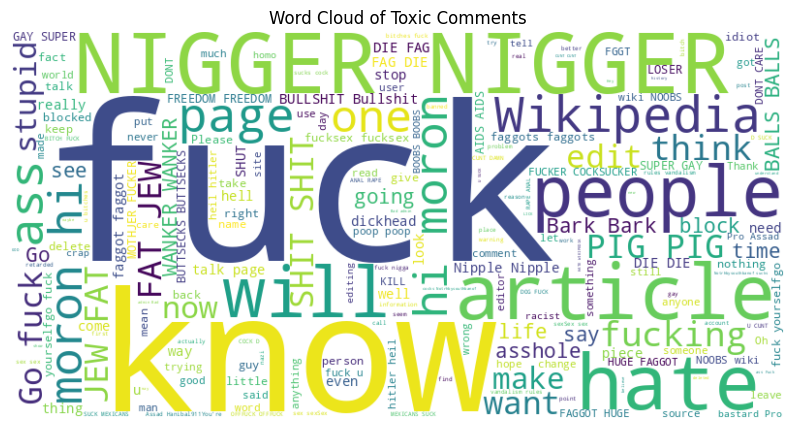

In [ ]:
# Word cloud of comments
toxic_comments = ' '.join(train_texts[train_labels[:, 0] == 1])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Toxic Comments')
plt.axis('off')
plt.show()

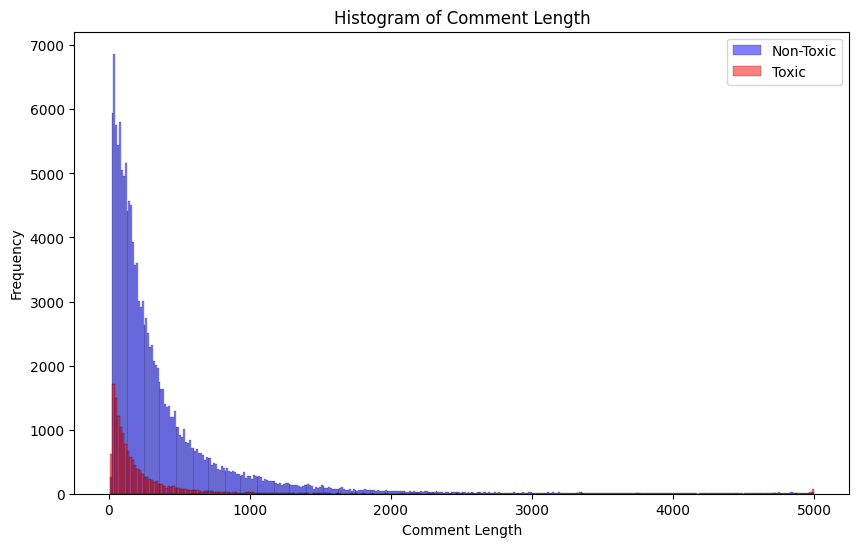

In [ ]:
# Histogram of comment length
plt.figure(figsize=(10, 6))
sns.histplot([len(comment) for comment in train_texts[train_labels[:, 0] == 0]], color='blue', label='Non-Toxic', alpha=0.5)
sns.histplot([len(comment) for comment in train_texts[train_labels[:, 0] == 1]], color='red', label='Toxic', alpha=0.5)
plt.title('Histogram of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [ ]:
# Pad sequences to ensure uniform length
max_len = 100
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

In [ ]:
# Convert labels to numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
#LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(LSTM(units=64))
model.add(Dense(units=6, activation='sigmoid'))  # 6 output units for 6 categories

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_data, train_labels, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
3990/3990 [==============================] - 2388s 598ms/step - loss: 0.0252 - accuracy: 0.9309 - val_loss: 0.0584 - val_accuracy: 0.9259
Epoch 2/3
3990/3990 [==============================] - 2295s 575ms/step - loss: 0.0193 - accuracy: 0.8013 - val_loss: 0.0634 - val_accuracy: 0.8501
Epoch 3/3
3990/3990 [==============================] - 2251s 564ms/step - loss: 0.0146 - accuracy: 0.7688 - val_loss: 0.0718 - val_accuracy: 0.8007


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", accuracy)

4787/4787 [==============================] - 123s 26ms/step - loss: 0.1922 - accuracy: 0.9827
Test Accuracy: 0.982691764831543


In [ ]:
model.save("hatespeechclass.h5")

In [ ]:
from keras.models import load_model
model = load_model("hatespeechclass.h5")

In [ ]:
# Predict toxicity for a given comment
comment = "Go jump off a cliff, you worthless idiot! #hate"
comment_sequence = tokenizer.texts_to_sequences([comment])
comment_sequence_padded = pad_sequences(comment_sequence, maxlen=max_len)
predictions = model.predict(comment_sequence_padded)

print("\nPredictions for the comment:", comment)
print("Toxicity probabilities:")
print("Toxic:", predictions[0][0])
print("Severe Toxic:", predictions[0][1])
print("Obscene:", predictions[0][2])
print("Threat:", predictions[0][3])
print("Insult:", predictions[0][4])
print("Identity Hate:", predictions[0][5])

1/1 [==============================] - 1s 743ms/step

Predictions for the comment: Go jump off a cliff, you worthless idiot! #hate
Toxicity probabilities:
Toxic: 0.991655
Severe Toxic: 0.08541628
Obscene: 0.7189243
Threat: 0.040018383
Insult: 0.9227513
Identity Hate: 0.1286743


4787/4787 [==============================] - 142s 30ms/step


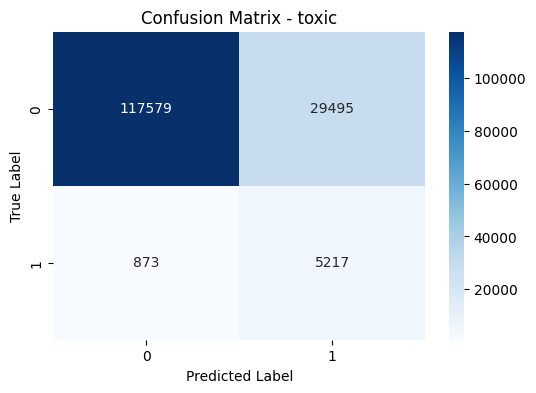

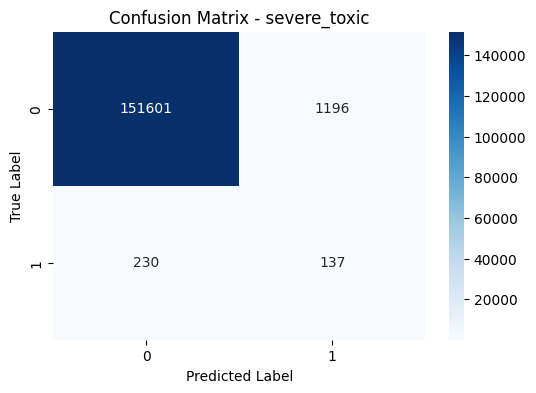

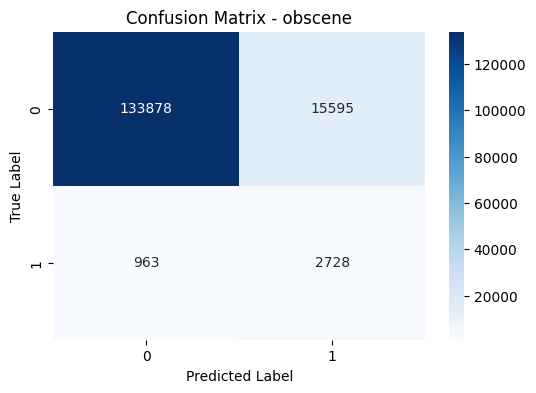

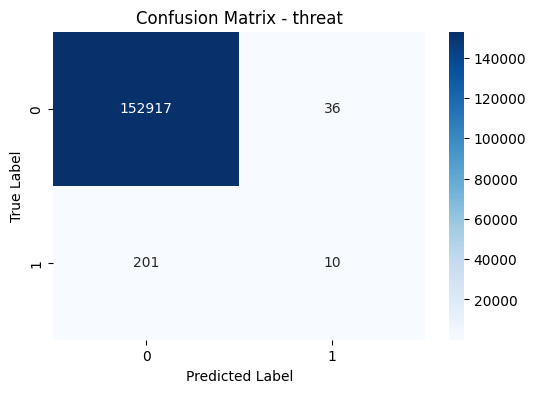

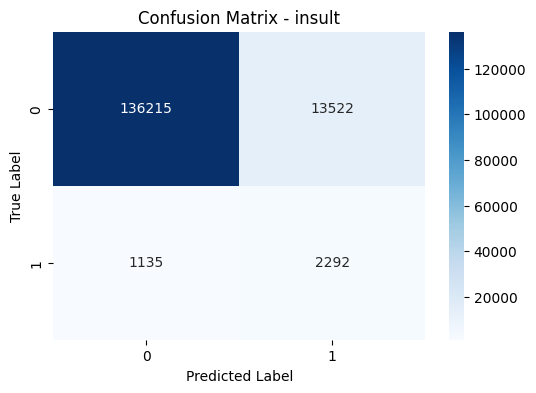

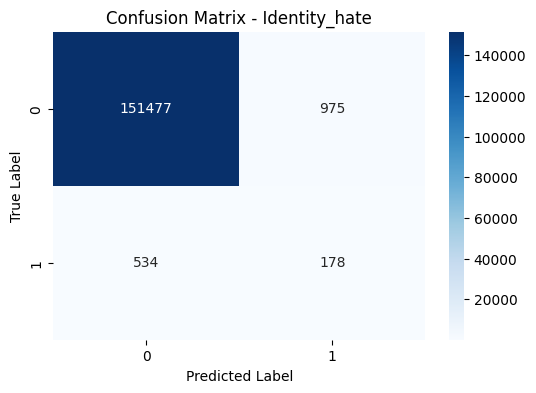

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

test_predictions = model.predict(test_data)

# Binarizing the predicted probabilities
threshold = 0.5
test_pred_labels = (test_predictions > threshold).astype(int)

# Calculate the confusion matrix for each label separately
conf_matrices = multilabel_confusion_matrix(test_labels, test_pred_labels)

labels = ['toxic','severe_toxic','obscene','threat','insult','Identity_hate']

# Plot confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {labels[i]}')
    plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tokens = word_tokenize(comment)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# POS tagging
tagged_tokens = pos_tag(filtered_tokens)

# Retrieve keywords based on POS tags
keywords = [word for word, pos in tagged_tokens if pos.startswith('N') or pos.startswith('J')]

print("Keywords in the comment:", keywords)

Keywords in the comment: ['Go', 'jump', 'cliff', 'worthless', 'idiot', 'hate']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
